In [1]:
import os
os.chdir("..")
os.chdir("../src")
from tool_preprocess import preprocesing_function_paraforest
os.chdir("../data")
import pandas as pd
df = pd.read_csv("quejas-clientes.csv", low_memory=False)
df.drop(columns=["Unnamed: 0"], inplace=True)

c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d

In [2]:
df

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1291006,Debt collection,NaN,Communication tactics,Frequent or repeated calls,TX,76119.0,2015-03-19,2015-03-19,"Premium Asset Services, LLC",In progress,Yes,NaN
1,1290580,Debt collection,Medical,Cont'd attempts collect debt not owed,Debt is not mine,TX,77479.0,2015-03-19,2015-03-19,Accounts Receivable Consultants Inc.,Closed with explanation,Yes,NaN
2,1290564,Mortgage,FHA mortgage,"Application, originator, mortgage broker",NaN,MA,2127.0,2015-03-19,2015-03-19,RBS Citizens,Closed with explanation,Yes,Yes
3,1291615,Credit card,NaN,Other,NaN,CA,92592.0,2015-03-19,2015-03-19,Navy FCU,In progress,Yes,NaN
4,1292165,Debt collection,Non-federal student loan,Cont'd attempts collect debt not owed,Debt resulted from identity theft,NaN,43068.0,2015-03-19,2015-03-19,Transworld Systems Inc.,In progress,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28151,1178184,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,75201.0,2015-01-01,2015-01-02,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,No
28152,1178183,Consumer loan,Vehicle loan,Taking out the loan or lease,NaN,GA,30043.0,2015-01-01,2015-01-07,DriveTime,Closed with explanation,Yes,NaN
28153,1178182,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,MN,55105.0,2015-01-01,2015-01-02,Regions,Closed with non-monetary relief,Yes,No
28154,1178181,Payday loan,NaN,Can't stop charges to bank account,NaN,CA,92509.0,2015-01-01,2015-01-07,Moneytree Inc,Closed with explanation,Yes,NaN


Queremos predecir si tendra una timely response o no.
Segyun el EDA la compañia no tiene importancia, 
tampoco tiene sentido que dejemos las quejas que esten en progreso.


In [3]:
df.drop(columns=["Company"], inplace=True)
df=df[df["Company response"]!="In progress"]
df=df[df["Company response"]!="Untimely response"]

In [4]:
df_processed = preprocesing_function_paraforest(df)
df_processed.head()

c:\Users\unaif\OneDrive\Documentos\Documentos_Clase_Data\PROYECTOS\nombre_proyecto_final_ML\Projecto-Final-ML\src\tool_preprocess.py:326: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ZIP code"].fillna(000, inplace=True)
c:\Users\unaif\OneDrive\Documentos\Documentos_Clase_Data\PROYECTOS\nombre_proyecto_final_ML\Projecto-Final-ML\src\tool_preprocess.py:329: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0.

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Date received,Date sent to company,Company response,Timely response?,Consumer disputed?
1,1290580,4,21,24,11,50,77479,2015-03-19,2015-03-19,1,1,1
2,1290564,6,11,7,45,23,2127,2015-03-19,2015-03-19,1,1,2
6,1288848,1,19,60,45,40,44241,2015-03-18,2015-03-18,1,1,2
7,1288788,4,31,23,6,7,95124,2015-03-18,2015-03-18,1,1,1
8,1288324,4,26,24,14,36,7067,2015-03-18,2015-03-18,3,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25114 entries, 1 to 28155
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Complaint ID          25114 non-null  int64  
 1   Product               25114 non-null  object 
 2   Sub-product           15612 non-null  object 
 3   Issue                 25112 non-null  object 
 4   Sub-issue             11788 non-null  object 
 5   State                 24726 non-null  object 
 6   ZIP code              24866 non-null  float64
 7   Date received         25114 non-null  object 
 8   Date sent to company  25114 non-null  object 
 9   Company response      25114 non-null  object 
 10  Timely response?      25114 non-null  object 
 11  Consumer disputed?    6006 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 3.0+ MB


In [36]:
df.columns

Index(['Complaint ID', 'Product', 'Sub-product', 'Issue', 'Sub-issue', 'State',
       'ZIP code', 'Date received', 'Date sent to company', 'Company response',
       'Timely response?', 'Consumer disputed?'],
      dtype='object')

In [6]:
X=df_processed.drop(columns=["Complaint ID", "Timely response?", "Consumer disputed?", "ZIP code","Date received"	,"Date sent to company", "Company response"])

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25114 entries, 1 to 28155
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Product      25114 non-null  int64
 1   Sub-product  25114 non-null  int64
 2   Issue        25114 non-null  int64
 3   Sub-issue    25114 non-null  int64
 4   State        25114 non-null  int64
dtypes: int64(5)
memory usage: 1.7 MB


In [8]:
y=df_processed["Timely response?"]

In [9]:
from imblearn.over_sampling import ADASYN

In [10]:
X_resampled, y_resampled = ADASYN(random_state=42).fit_resample(X, y)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.20, random_state = 42, shuffle=True)

In [12]:
X_train

,Product,Sub-product,Issue,Sub-issue,State
1231,0,4,88,45,9
7751,4,26,37,23,12
108,4,26,46,8,43
39966,3,39,53,1,8
29019,4,21,24,14,12
...,...,...,...,...,...
11284,6,5,77,45,33
44732,6,6,54,45,13
38158,4,21,23,15,7
860,3,39,49,20,38


In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
"""tree_class=DecisionTreeClassifier(criterion= "gini", max_depth=40, min_samples_leaf=10, random_state=24)"""

'tree_class=DecisionTreeClassifier(criterion= "gini", max_depth=40, min_samples_leaf=10, random_state=24)'

In [15]:
"""tree_class=DecisionTreeClassifier(criterion= "gini", max_depth=7, min_samples_leaf=5, random_state=24)"""

'tree_class=DecisionTreeClassifier(criterion= "gini", max_depth=7, min_samples_leaf=5, random_state=24)'

In [16]:
tree_class1=RandomForestClassifier( random_state=42)

In [17]:
from sklearn.model_selection import GridSearchCV

parameters = {
    "criterion": ["gini", "entropy", ],
    "max_depth":list(range(1,40)), 
    "min_samples_leaf":list(range(15,30)),


}

tree_class = GridSearchCV(estimator = tree_class1,
                  param_grid = parameters,
                  n_jobs = -1,
                  cv = 10,
                  scoring="roc_auc", 
                  refit=True)



In [18]:
tree_class.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'min_samples_leaf': [15, 16, 17, 18, 19, 20, 21, 22,
                                              23, 24, 25, 26, 27, 28, 29]},
             scoring='roc_auc')

In [19]:

results = pd.DataFrame(tree_class.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.772938,0.224582,0.017235,0.001374,gini,1,15,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.703213,0.700800,...,0.720820,0.718280,0.706824,0.701028,0.708438,0.710355,0.707635,0.707677,0.006885,1156
1,0.763736,0.224622,0.016947,0.001407,gini,1,16,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.703213,0.700800,...,0.720820,0.718280,0.706824,0.701028,0.708438,0.710355,0.707635,0.707677,0.006885,1156
2,0.795744,0.235534,0.017905,0.001225,gini,1,17,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.703213,0.700800,...,0.720820,0.718280,0.706824,0.701028,0.708438,0.710355,0.707635,0.707677,0.006885,1156
3,0.798152,0.242908,0.019113,0.004831,gini,1,18,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.703213,0.700800,...,0.720820,0.718280,0.706824,0.701028,0.708438,0.710355,0.707635,0.707677,0.006885,1156
4,0.814794,0.226577,0.020658,0.007943,gini,1,19,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.703213,0.700800,...,0.720820,0.718280,0.706824,0.701028,0.708438,0.710355,0.707635,0.707677,0.006885,1156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,2.376670,0.260409,0.047976,0.003670,entropy,39,25,"{'criterion': 'entropy', 'max_depth': 39, 'min...",0.953877,0.960178,...,0.960418,0.955033,0.954814,0.954516,0.958143,0.953593,0.958738,0.956468,0.002492,486
1166,2.266005,0.390420,0.048275,0.007803,entropy,39,26,"{'criterion': 'entropy', 'max_depth': 39, 'min...",0.953420,0.959905,...,0.960041,0.954802,0.952313,0.954520,0.956396,0.951962,0.957531,0.955534,0.002729,569
1167,2.124625,0.263809,0.047123,0.004114,entropy,39,27,"{'criterion': 'entropy', 'max_depth': 39, 'min...",0.952086,0.958861,...,0.959086,0.954315,0.952263,0.953302,0.955574,0.951223,0.956458,0.954679,0.002618,621
1168,2.144287,0.341579,0.046348,0.004359,entropy,39,28,"{'criterion': 'entropy', 'max_depth': 39, 'min...",0.951193,0.958464,...,0.958680,0.953163,0.950806,0.952124,0.954558,0.950660,0.956228,0.953922,0.002845,674


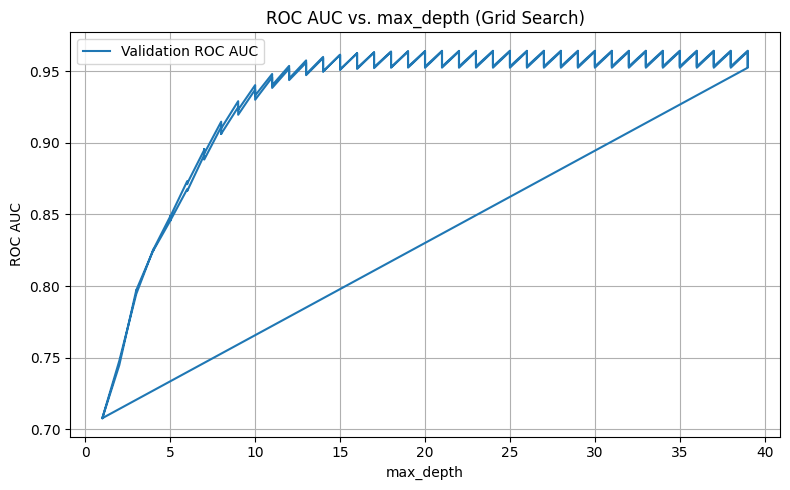

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(results['param_max_depth'], results['mean_test_score'],  label='Validation ROC AUC')
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')
plt.title('ROC AUC vs. max_depth (Grid Search)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
tree_class.best_params_

{'criterion': 'entropy', 'max_depth': 25, 'min_samples_leaf': 15}

In [23]:
tree_class_def=RandomForestClassifier(**tree_class.best_params_)
tree_class_def.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=25, min_samples_leaf=15)

Accuracy: 0.9055785332391809
AUC-ROC: 0.9054228505762286
Classification Report:
              precision    recall  f1-score   support

          No       0.89      0.93      0.91      4990
         Yes       0.92      0.88      0.90      4923

    accuracy                           0.91      9913
   macro avg       0.91      0.91      0.91      9913
weighted avg       0.91      0.91      0.91      9913

Confusion Matrix:
[[0.92845691 0.07154309]
 [0.11761121 0.88238879]]


<Axes: >

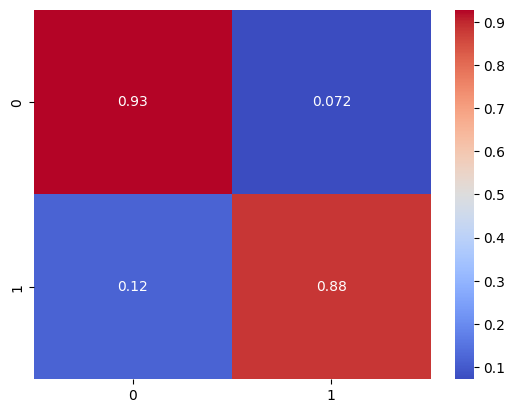

In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns

y_pred=(tree_class_def.predict_proba(X_test)[:,1]>=0.5)

accuracy = accuracy_score(y_test, y_pred)
oversampler=ADASYN(random_state=42)
roc = roc_auc_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"AUC-ROC: {roc}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["No", "Yes"]))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred, normalize='true'))
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot= True, cmap="coolwarm")

In [25]:
from sklearn.model_selection import cross_validate
cross_val=cross_validate(tree_class_def, X_train, y_train, cv=10)["test_score"]

print(cross_val.mean())
print(cross_val.std())

0.8970542931436759
0.006194112036708569


In [26]:
feature_names = X_train.columns  # si X_train es un DataFrame
# Si no tienes nombres, puedes usar por defecto: feature_names = [f'feature_{i}' for i in range(X_train.shape[1])]

# Obtener importancia
importances = tree_class_def.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

       Feature  Importance
1  Sub-product    0.235141
0      Product    0.204629
4        State    0.203752
3    Sub-issue    0.191250
2        Issue    0.165228


In [ ]:
---

SyntaxError: invalid syntax (1947214667.py, line 1)

In [30]:
import os 
import pickle
os.chdir("../models")

with open('modelo_timely_rf_sin_company.pkl', 'wb') as f:
    pickle.dump(tree_class_def, f)

In [ ]:
objeto.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0])